In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.drop('Outcome',axis=1)
y = df.Outcome

In [5]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [29]:
print('training shape\t',x_train.shape[0])
print('testing shape\t',x_test.shape[0])

training shape	 614
testing shape	 154


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [31]:
import warnings 
warnings.filterwarnings('ignore')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
# finding out probablities

y_probab = lr.predict_proba(x_test)[:,1]

In [33]:
# importing roc curve 

from sklearn.metrics import roc_curve

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,y_probab)

In [35]:
len(thresholds)

50

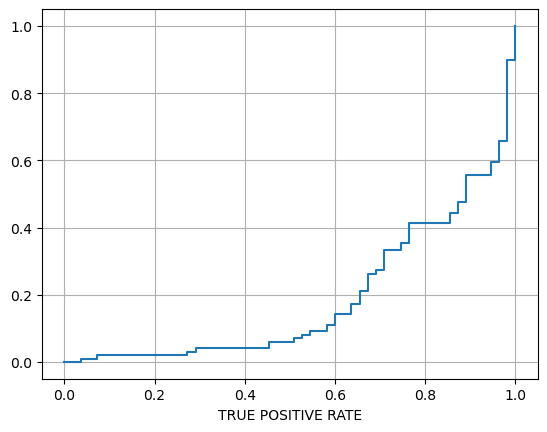

In [36]:
# fpr
# tpr

plt.plot(tpr,fpr)
plt.xlabel('FALSE POSITIVE RATE')
plt.xlabel('TRUE POSITIVE RATE')
plt.grid()
plt.show()

In [37]:
import plotly.express as px 
temp = pd.DataFrame()
temp['tpr'] = tpr 
temp['fpr'] = fpr
temp['thresh'] = np.where(np.isinf(thresholds),1,thresholds)
temp.head()

,tpr,fpr,thresh
0,0.000000,0.000000,1.000000
1,0.018182,0.000000,0.971152
2,0.036364,0.000000,0.968137
3,0.036364,0.010101,0.956303
4,0.072727,0.010101,0.902625


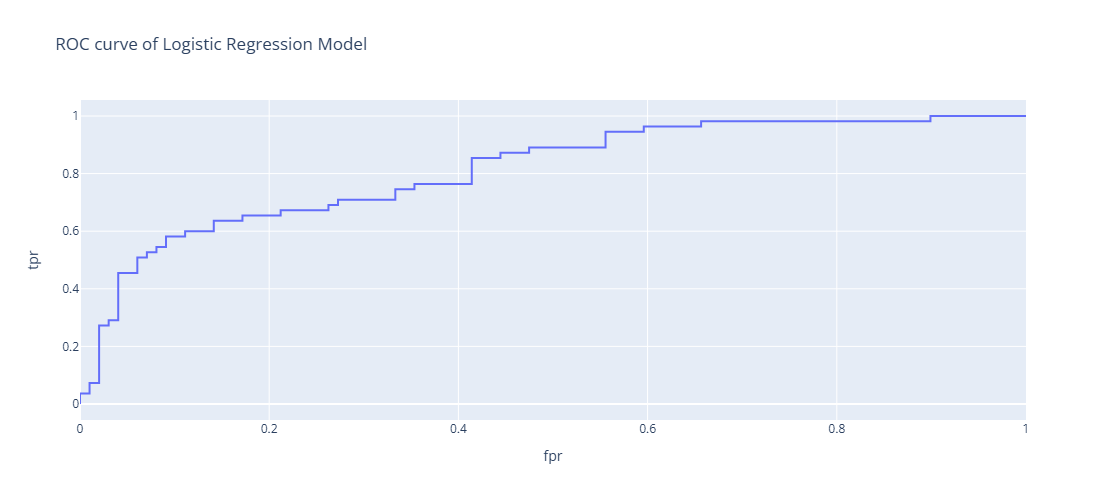

In [38]:
px.line(temp,x='fpr',y='tpr',hover_data=temp.columns,title='ROC curve of Logistic Regression Model').update_layout(height=500,width=700)

### if incase plotly graph is not visible 
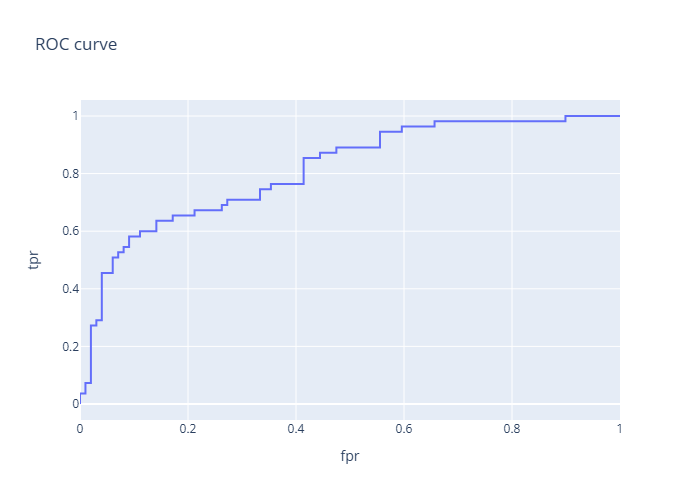

In [39]:
temp['youden_j'] = temp['tpr'] - temp['fpr']
# The threshold corresponding to the maximum J is usually considered the best trade-off between sensitivity and specificity.

In [40]:
temp[temp.youden_j==np.max(temp.youden_j)]
# which means 0.55 would be the best threshold for my model 

,tpr,fpr,thresh,youden_j
22,0.636364,0.141414,0.550326,0.494949




##### The AUC-ROC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds.

* An AUC of 1 indicates that the model has perfect discrimination: it correctly classifies all positive and negative instances.
* An AUC of 0.5 suggests the model has no discrimination ability: it is as good as random guessing.
* An AUC of 0 indicates that the model is perfectly wrong: it classifies all positive instances as negative and all negative instances as positive.

In practice, AUC values usually fall between 0.5 (random) and 1 (perfect), with higher values indicating better classification performance.


In [41]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [42]:
svc_probab = svc.predict_proba(x_test)[:,1]

In [43]:
fpr, tpr, thresholds = roc_curve(y_test,svc_probab)
thresholds
svc_temp = pd.DataFrame()
svc_temp['tpr'] = tpr 
svc_temp['fpr'] = fpr
svc_temp['thresh'] = np.where(np.isinf(thresholds),1,thresholds)
svc_temp.head()


,tpr,fpr,thresh
0,0.000000,0.000000,1.000000
1,0.018182,0.000000,0.937191
2,0.072727,0.000000,0.897955
3,0.072727,0.030303,0.867822
4,0.236364,0.030303,0.804206


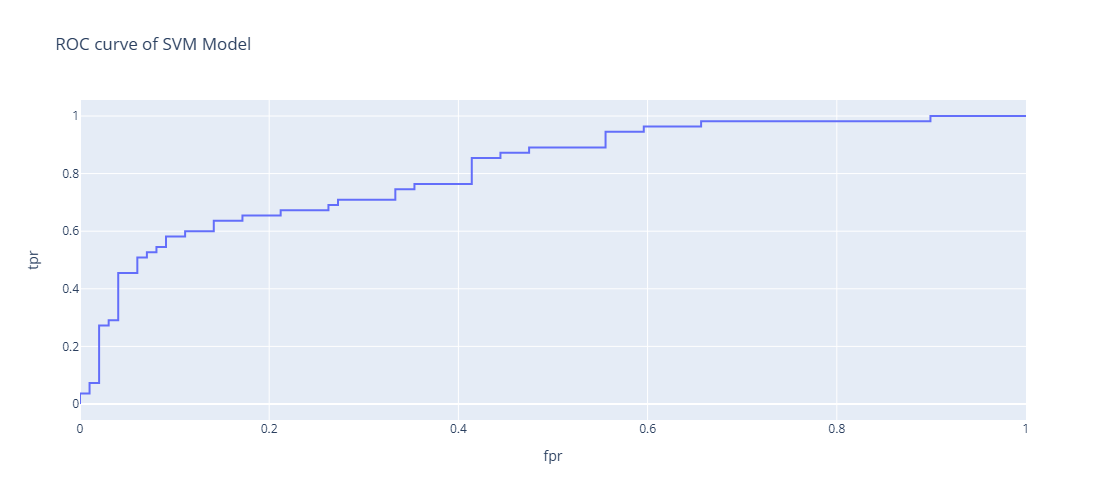

In [44]:
px.line(temp,x='fpr',y='tpr',hover_data=temp.columns,title='ROC curve of SVM Model').update_layout(height=500,width=700)

In [45]:
svc_temp['youden_j'] = svc_temp['tpr'] - svc_temp['fpr']
svc_temp[svc_temp.youden_j==np.max(svc_temp.youden_j)]

,tpr,fpr,thresh,youden_j
26,0.690909,0.181818,0.420885,0.509091


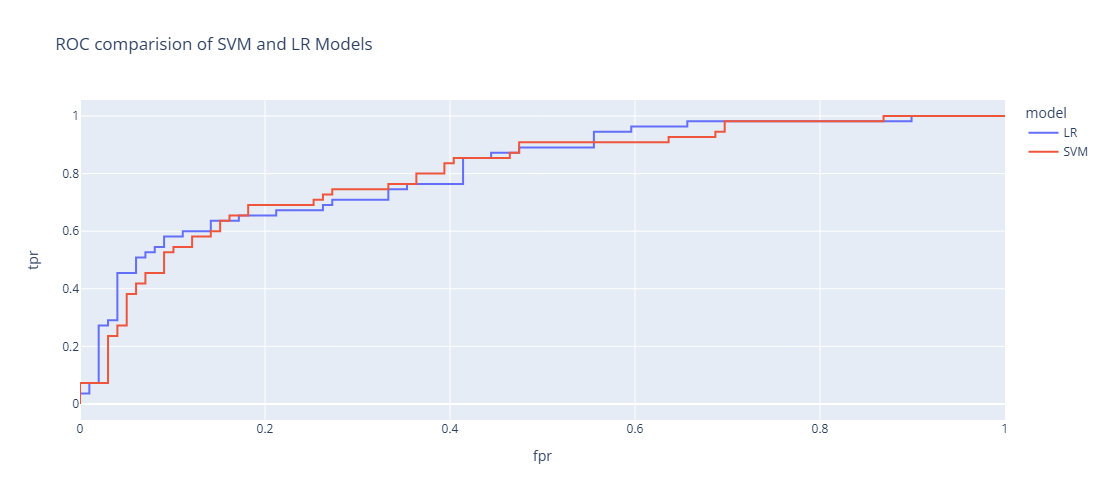

In [46]:
temp['model'] = 'LR'
temp.head()
svc_temp['model'] = 'SVM'
svc_temp.head()
comp = pd.concat((temp,svc_temp),axis=0)

px.line(comp,x='fpr',y='tpr',color='model',hover_data=comp.columns,title='ROC comparision of SVM and LR Models').update_layout(height=500,width=700)

In [47]:
from sklearn.metrics import roc_auc_score
print('for lr\t',roc_auc_score(y_test,y_probab))
print('for SVM\t',roc_auc_score(y_test,svc_probab))

for lr	 0.8128558310376492
for SVM	 0.8066115702479338
